<a href="https://colab.research.google.com/github/sagasucksatlife1/QunatProjects/blob/main/final_cancer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview—

To identify differentially expressed genes (DEGs) between **tumor** and **normal** samples using gene expression data. The goal is to find genes that are significantly up- or down-regulated in cancer, visualize them, and perform biological enrichment analysis (e.g., GO terms, pathways).

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/working set.xlsx')
df.head()

,TYPE,TP53,WRAP53,TP53TG1,TP5313,TP53BP1,TP53BP2,MIR34A,MDM2,CDKN1A,...,RRM2B,BAX,BBC3,PMAIP1,TP63,TP73,SESN1,FAS,ZMAT3,PREP
0,Normal,4.04,1.63,NaN,3.84,1.50,4.09,NaN,1.00,7.13,...,3.28,3.43,2.730038,-1.21,-2.26,-2.80,6.47,3.05,3.05,4.77
1,Normal,4.02,2.00,NaN,3.74,1.44,3.16,NaN,2.00,6.90,...,3.64,2.97,2.135996,-1.38,-2.94,-2.71,6.48,3.01,3.01,2.81
2,Normal,4.02,1.85,NaN,3.74,1.44,3.16,NaN,2.04,6.90,...,2.88,4.30,2.841402,-1.38,-1.92,-3.26,6.46,3.01,3.01,3.40
3,Normal,3.98,2.07,NaN,3.46,1.29,4.81,NaN,2.32,6.11,...,3.13,3.92,3.358137,-1.91,-3.01,-3.09,6.46,2.90,2.90,2.35
4,Normal,3.98,1.32,NaN,4.41,1.87,2.23,NaN,2.49,8.15,...,3.49,5.58,2.020499,-0.37,-1.89,-2.75,6.48,3.31,3.31,1.21


In [ ]:
normal= df[df["TYPE"]=="Normal"]
tumor= df[df["TYPE"]== "Tumor"]

DATA SET SETS TRIED AND TESTED TILL NOW…3

1. BREAST CANCER DATASET … PROBLEM (ANNOTATIONS OF THE GENES COULD NOT BE FOUND + NOT WORABLE MESS )
    
    [chinSF2007_public_clinicalMatrix.txt](attachment:678e603e-2af5-40d3-ab7a-8ad052a5789c:chinSF2007_public_clinicalMatrix.txt)
    
    []()
    
2. YAU DATASET HAD PROBLEMS THAT THE AANOTAIONS USED FOR THE PERSON IN CLINICAL DATA AND EXPRESSION DATA WERE VERY DIFFERENT + MAJOR CANCER GENE EXPRESSION LIKE BRAC1 AND TP53 WERE NOT FOUND ALONG WIT 20 OTHER MAJOR GENE EXPESSIONS.

[YauClinical_public_YauClinical_public_clinicalMatrix.gz](attachment:67fc431a-539e-4101-a93b-796d02d6afc4:YauClinical_public_YauClinical_public_clinicalMatrix.gz)

[]()

3. LIVER CANCER DATABASE

FINAL DATABASE SORTED FOR THIS PROJECT. HAD 425 SAMPLES ALL 20 GENES EXPRESSION IN CODED FORM AS WELL BUT EAILY EXTRACTED. STILL ONE PROLEM WITH THIS DATA SAMPLE WAS THAT IT HAD NO NORMAL SAMPLE TO PERFOEM DEG…. SOLN (BYSELF) CREATING A SET OF 20 VALUES FOR EACH GENE WITH AROUND THE AVERAGE OF THE NORMAL DATABASE SO 20*20=400 VALUES THEN PERFORMING T TEST ON THOSE VALUE TO GET THE SET OF THE BEST 20 NORMAL GENE EXPRESSION FOR 20 HUMANS THAT ACTS AS A REFERENCE POINT FOR THE DATA … AND DUE TO THE SAT IT GIVES US THE PERFECT DATA BASE.

THIS CODE WAS USED TO SORT THE CLINICAL DATA

[clinical_data (3).csv](attachment:16dff81f-1aca-4c09-b212-5eca735605fd:clinical_data_(3).csv)

THEN FINNALY THE CODE FILE WAS GIVEN TO CHATGPT TO MERGE THE CODE

[merged_clinical_then_expression.csv](attachment:55574582-3ad7-45b8-b6eb-a56295ad9b1c:merged_clinical_then_expression.csv)

![Screenshot 2025-07-10 091450.png](attachment:879effd2-476a-4801-88c0-9f2930a3cfa2:Screenshot_2025-07-10_091450.png)

NOW THE DATATSET OF NORMAL GENETIC EXPRESSIONS

1.  find the normal liver tissue … for gene like TP53
2. then make and excel of those an find the mean

In [ ]:
normal.head()
tumor.head()

,TYPE,TP53,WRAP53,TP53TG1,TP5313,TP53BP1,TP53BP2,MIR34A,MDM2,CDKN1A,...,RRM2B,BAX,BBC3,PMAIP1,TP63,TP73,SESN1,FAS,ZMAT3,PREP
21,Tumor,3.024018,0.643949,0.306146,2.576933,3.448967,3.873232,2.321928,0.196607,1.254655,...,3.075704,1.195159,0.884871,6.189469,0.727877,4.252991,4.229642,0.235605,2.461764,8.062133
22,Tumor,3.680943,1.343465,0.524565,2.334082,3.022545,2.681921,2.079224,0.263876,0.805623,...,2.782786,1.758602,1.264056,4.799118,4.233121,4.671480,4.410002,6.114713,3.652418,4.497485
23,Tumor,1.027649,0.405557,0.251446,2.307516,2.741942,4.529334,0.908121,0.000000,0.556111,...,2.052346,0.778293,0.330903,3.622438,3.056792,3.728563,4.324155,1.624475,1.999748,5.618556
24,Tumor,3.803878,0.622368,0.324235,2.470719,3.417083,4.177974,3.071248,0.426640,0.882134,...,0.640251,1.545425,1.500649,4.536706,0.874758,4.215127,4.118169,4.720481,3.347226,6.033335
25,Tumor,2.067054,0.123004,0.053945,3.465557,2.644456,3.556221,1.267236,0.199248,0.734829,...,0.047399,0.786262,0.592636,3.396776,2.541738,2.816641,4.047425,2.503018,1.994869,6.036910


In [ ]:
normal_vals= normal.drop(columns=["TYPE"])
tumor_vals= tumor.drop(columns=["TYPE"])

In [ ]:
normal_mean= normal_vals.mean()
tumor_mean= tumor_vals.mean()

In [ ]:
print("normal_mean")
print(normal_mean)
print("tumor_mean")
print(tumor_mean)

normal_mean
TP53       4.037550
WRAP53     1.744250
TP53TG1         NaN
TP5313     3.567550
TP53BP1    1.324550
TP53BP2    3.899350
MIR34A          NaN
MDM2       2.656500
CDKN1A     7.337000
GADD45A    6.151600
RRM2B      3.068000
BAX        4.425200
BBC3       2.238169
PMAIP1    -1.136550
TP63      -2.652250
TP73      -2.547250
SESN1      6.470550
FAS        3.049850
ZMAT3      3.049850
PREP       2.990900
dtype: float64
tumor_mean
TP53       2.513717
WRAP53     0.838616
TP53TG1    0.316122
TP5313     3.004572
TP53BP1    2.853585
TP53BP2    3.012875
MIR34A     2.006163
MDM2       0.185964
CDKN1A     0.813352
GADD45A    1.895363
RRM2B      1.581950
BAX        1.246920
BBC3       0.780775
PMAIP1     4.161356
TP63       2.940946
TP73       3.787907
SESN1      3.962889
FAS        2.424497
ZMAT3      2.648919
PREP       5.914888
dtype: float64


In [ ]:
logFC= tumor_mean - normal_mean
print("logFC", logFC)
DEGs = logFC[abs(logFC)>=1]
print("significant DEGs", DEGs)

logFC TP53      -1.523833
WRAP53    -0.905634
TP53TG1         NaN
TP5313    -0.562978
TP53BP1    1.529035
TP53BP2   -0.886475
MIR34A          NaN
MDM2      -2.470536
CDKN1A    -6.523648
GADD45A   -4.256237
RRM2B     -1.486050
BAX       -3.178280
BBC3      -1.457393
PMAIP1     5.297906
TP63       5.593196
TP73       6.335157
SESN1     -2.507661
FAS       -0.625353
ZMAT3     -0.400931
PREP       2.923988
dtype: float64
significant DEGs TP53      -1.523833
TP53BP1    1.529035
MDM2      -2.470536
CDKN1A    -6.523648
GADD45A   -4.256237
RRM2B     -1.486050
BAX       -3.178280
BBC3      -1.457393
PMAIP1     5.297906
TP63       5.593196
TP73       6.335157
SESN1     -2.507661
PREP       2.923988
dtype: float64


In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

# Ensure we only take numeric columns
tumor_data = tumor.select_dtypes(include='number')
normal_data = normal.select_dtypes(include='number')

# Calculate p-values for each gene
p_values = {}
for gene in tumor_data.columns:
    if gene in normal_data.columns:  # ensure same genes
        t_stat, p_val = ttest_ind(tumor_data[gene].dropna(), normal_data[gene].dropna(), equal_var=False)
        p_values[gene] = p_val

p_values = pd.Series(p_values)

# Combine log2FC and p-values into one table
results = pd.DataFrame({'log2FC': logFC, 'p-value': p_values})

# Filter Significant DEGs
significant_DEGs = results[(abs(results['log2FC']) >= 1) & (results['p-value'] < 0.05)]
print("\n✅ Significant DEGs:\n", significant_DEGs)
significant_DEGs.to_excel("significant_DEGs.xlsx")


✅ Significant DEGs:
            log2FC        p-value
TP53    -1.523833  1.447976e-139
TP53BP1  1.529035   1.497165e-08
MDM2    -2.470536   4.662527e-12
CDKN1A  -6.523648   7.906971e-17
GADD45A -4.256237   5.557599e-12
RRM2B   -1.486050   5.251376e-13
BAX     -3.178280   5.011016e-13
BBC3    -1.457393   1.494501e-07
PMAIP1   5.297906   1.120327e-14
TP63     5.593196   1.918612e-17
TP73     6.335157   4.831840e-17
SESN1   -2.507661  3.966548e-223
PREP     2.923988   1.463468e-08


1. then u get the avg… plot 20 values around the avg by chatgpt so that the values have the same mean…
2. then convert them into the same unit … which is log2(ntmp)
3. u have 20 values of tp53 gene in liver tissues
    
    [TP53_Normal_Samples_in_log2_Scale.csv](attachment:8ab1564e-eb09-44bf-b506-3e9bf8a9a1f4:TP53_Normal_Samples_in_log2_Scale.csv)
    

simpler version use the data in the database rather then anything else and eatup the first three steps

prompt to gpt ====

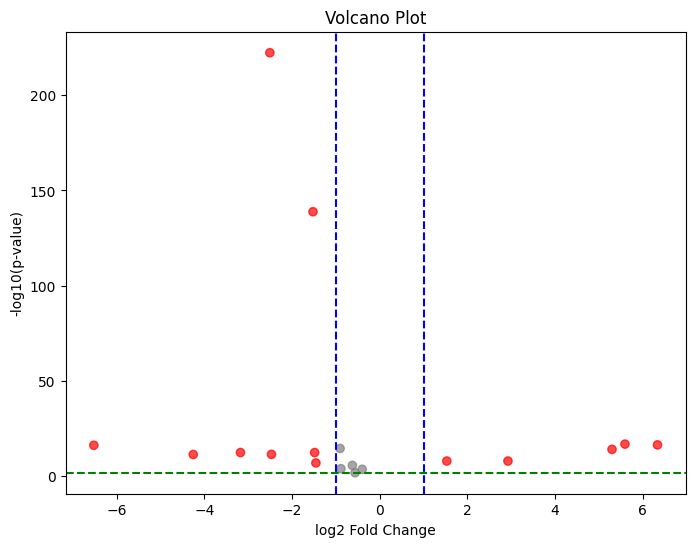

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(results['log2FC'], -np.log10(results['p-value']),
            c=['red' if (abs(fc) >= 1 and p < 0.05) else 'gray'
               for fc, p in zip(results['log2FC'], results['p-value'])],
            alpha=0.7)

plt.axvline(x=1, color='blue', linestyle='--')
plt.axvline(x=-1, color='blue', linestyle='--')
plt.axhline(y=-np.log10(0.05), color='green', linestyle='--')

plt.title("Volcano Plot")
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10(p-value)")
plt.show()

final stuff… when we add all of these sample in one table we get

[normal genes .....xlsx](attachment:fe0e3c47-0e9d-4fd9-aaba-bfe58c8d6f58:normal_genes_.....xlsx)

when we feed this data in to chatgpt for it to create 20 combinations of gene expression that best mimic the normal human tissue… we get this final dataset

[normal final sample set.....xlsx](attachment:f0735fb9-ad46-4ef8-9edb-1c960959a1f4:normal_final_sample_set.....xlsx)

but as we need to work on one sample we merge the two and remove the clinical data or the  tumor patients for simplicity and also label them in normal and tumor

[working set.xlsx](attachment:d54fcd91-af87-4bf8-9854-a6773ac01383:working_set.xlsx)

In [ ]:
# Extract gene names only
significant_genes = significant_DEGs.index.tolist()

# Save to TXT for gProfiler or DAVID
with open("significant_genes.txt", "w") as f:
    for gene in significant_genes:
        f.write(f"{gene}\n")

print("Exported significant_genes.txt")


Exported significant_genes.txt ✅


[significant_genes.txt](attachment:c8c1b0fb-72d4-4fdb-8c30-bed558b77f72:significant_genes.txt)

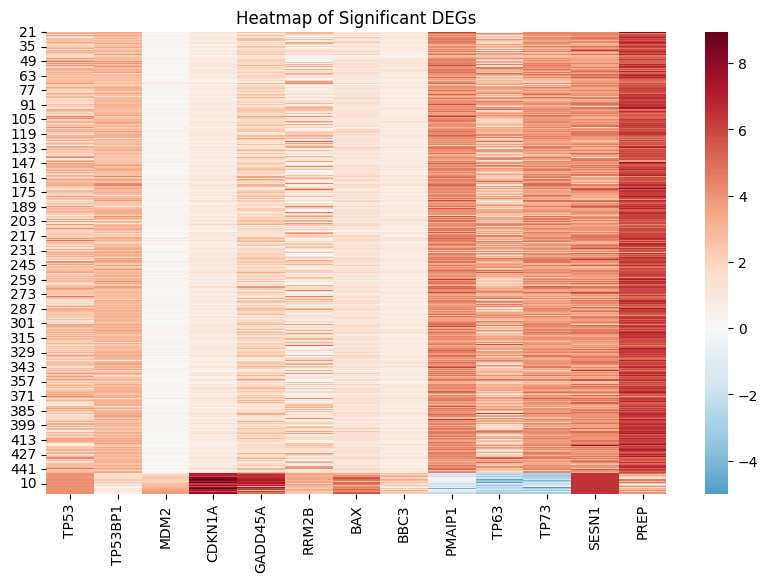

In [ ]:
import seaborn as sns
import pandas as pd

# Select only significant genes from tumor + normal data
heatmap_data = pd.concat([tumor_data[significant_genes], normal_data[significant_genes]])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="RdBu_r", center=0)
plt.title("Heatmap of Significant DEGs")
plt.show()
